In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import pandas as pd
import anndata

In [2]:
path = 'data/DLPFC'

# Preprocessing

In [3]:
sampleid = np.array(pd.read_csv(f'{path}/sampleid3.csv'))[[0,1],0]

In [4]:
for i in sampleid:
    gene = pd.read_csv(f'{path}/{i}_gene.csv',index_col=0).T
    spatial = pd.read_csv(f'{path}/{i}_spatial.csv')
    celltype = pd.read_csv(f'{path}/{i}_celltype.csv')

    for j in range(gene.shape[0]-1,-1,-1):
        if celltype['V1'].iloc[j] is np.nan:
            gene = gene.drop(gene.index[j])
            spatial = spatial.drop(spatial.index[j])
            celltype = celltype.drop(celltype.index[j])

    spatial = np.array(spatial)
    celltype = np.array(celltype)
    
    obs = gene.index
    var = gene.columns
    gene = np.array(gene)
    
    globals()[f"data_{i}"]=ad.AnnData(gene)
    globals()[f"data_{i}"].obsm['spatial']=spatial
    globals()[f"data_{i}"].obsm['celltype']=celltype
    globals()[f"data_{i}"].var_names = var
    globals()[f"data_{i}"].obs_names = obs
    
    sc.pp.filter_genes(globals()[f"data_{i}"], min_cells=10)
    globals()[f"data_{i}"].layers["counts"] = globals()[f"data_{i}"].X.copy()
    sc.pp.normalize_total(globals()[f"data_{i}"], inplace=True)
    sc.pp.log1p(globals()[f"data_{i}"])
    sc.pp.highly_variable_genes(globals()[f"data_{i}"], flavor="seurat", n_top_genes=3000, subset=True)

In [5]:
index_151673 = []
index_151674 = []
    
for i in range(data_151673.shape[1]):
    if(data_151673.var_names[i] in data_151674.var_names):
        index_151673.append(np.where(data_151673.var_names==data_151673.var_names[i])[0][0])
        index_151674.append(np.where(data_151674.var_names==data_151673.var_names[i])[0][0])

data_151673 = data_151673[:,index_151673]
data_151674 = data_151674[:,index_151674]

In [6]:
for j in sampleid:
    color=[]
    for i in range(globals()[f'data_{j}'].shape[0]):
        if(globals()[f'data_{j}'].obsm['celltype'][i] == 'L1'):
            color.append('pink')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'L2'):
            color.append('blue')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'L3'):
            color.append('green')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'L4'):
            color.append('orange')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'L5'):
            color.append('purple')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'L6'):
            color.append('red')
        elif(globals()[f'data_{j}'].obsm['celltype'][i] == 'WM'):
            color.append('yellow')

    color = np.array(color).reshape((globals()[f'data_{j}'].shape[0],1))
    globals()[f'data_{j}'].obsm['color'] = color

C:\Users\10848\AppData\Local\Temp\ipykernel_27760\63967454.py:20: ImplicitModificationWarning: Setting element `.obsm['color']` of view, initializing view as actual.
  globals()[f'data_{j}'].obsm['color'] = color
C:\Users\10848\AppData\Local\Temp\ipykernel_27760\63967454.py:20: ImplicitModificationWarning: Setting element `.obsm['color']` of view, initializing view as actual.
  globals()[f'data_{j}'].obsm['color'] = color


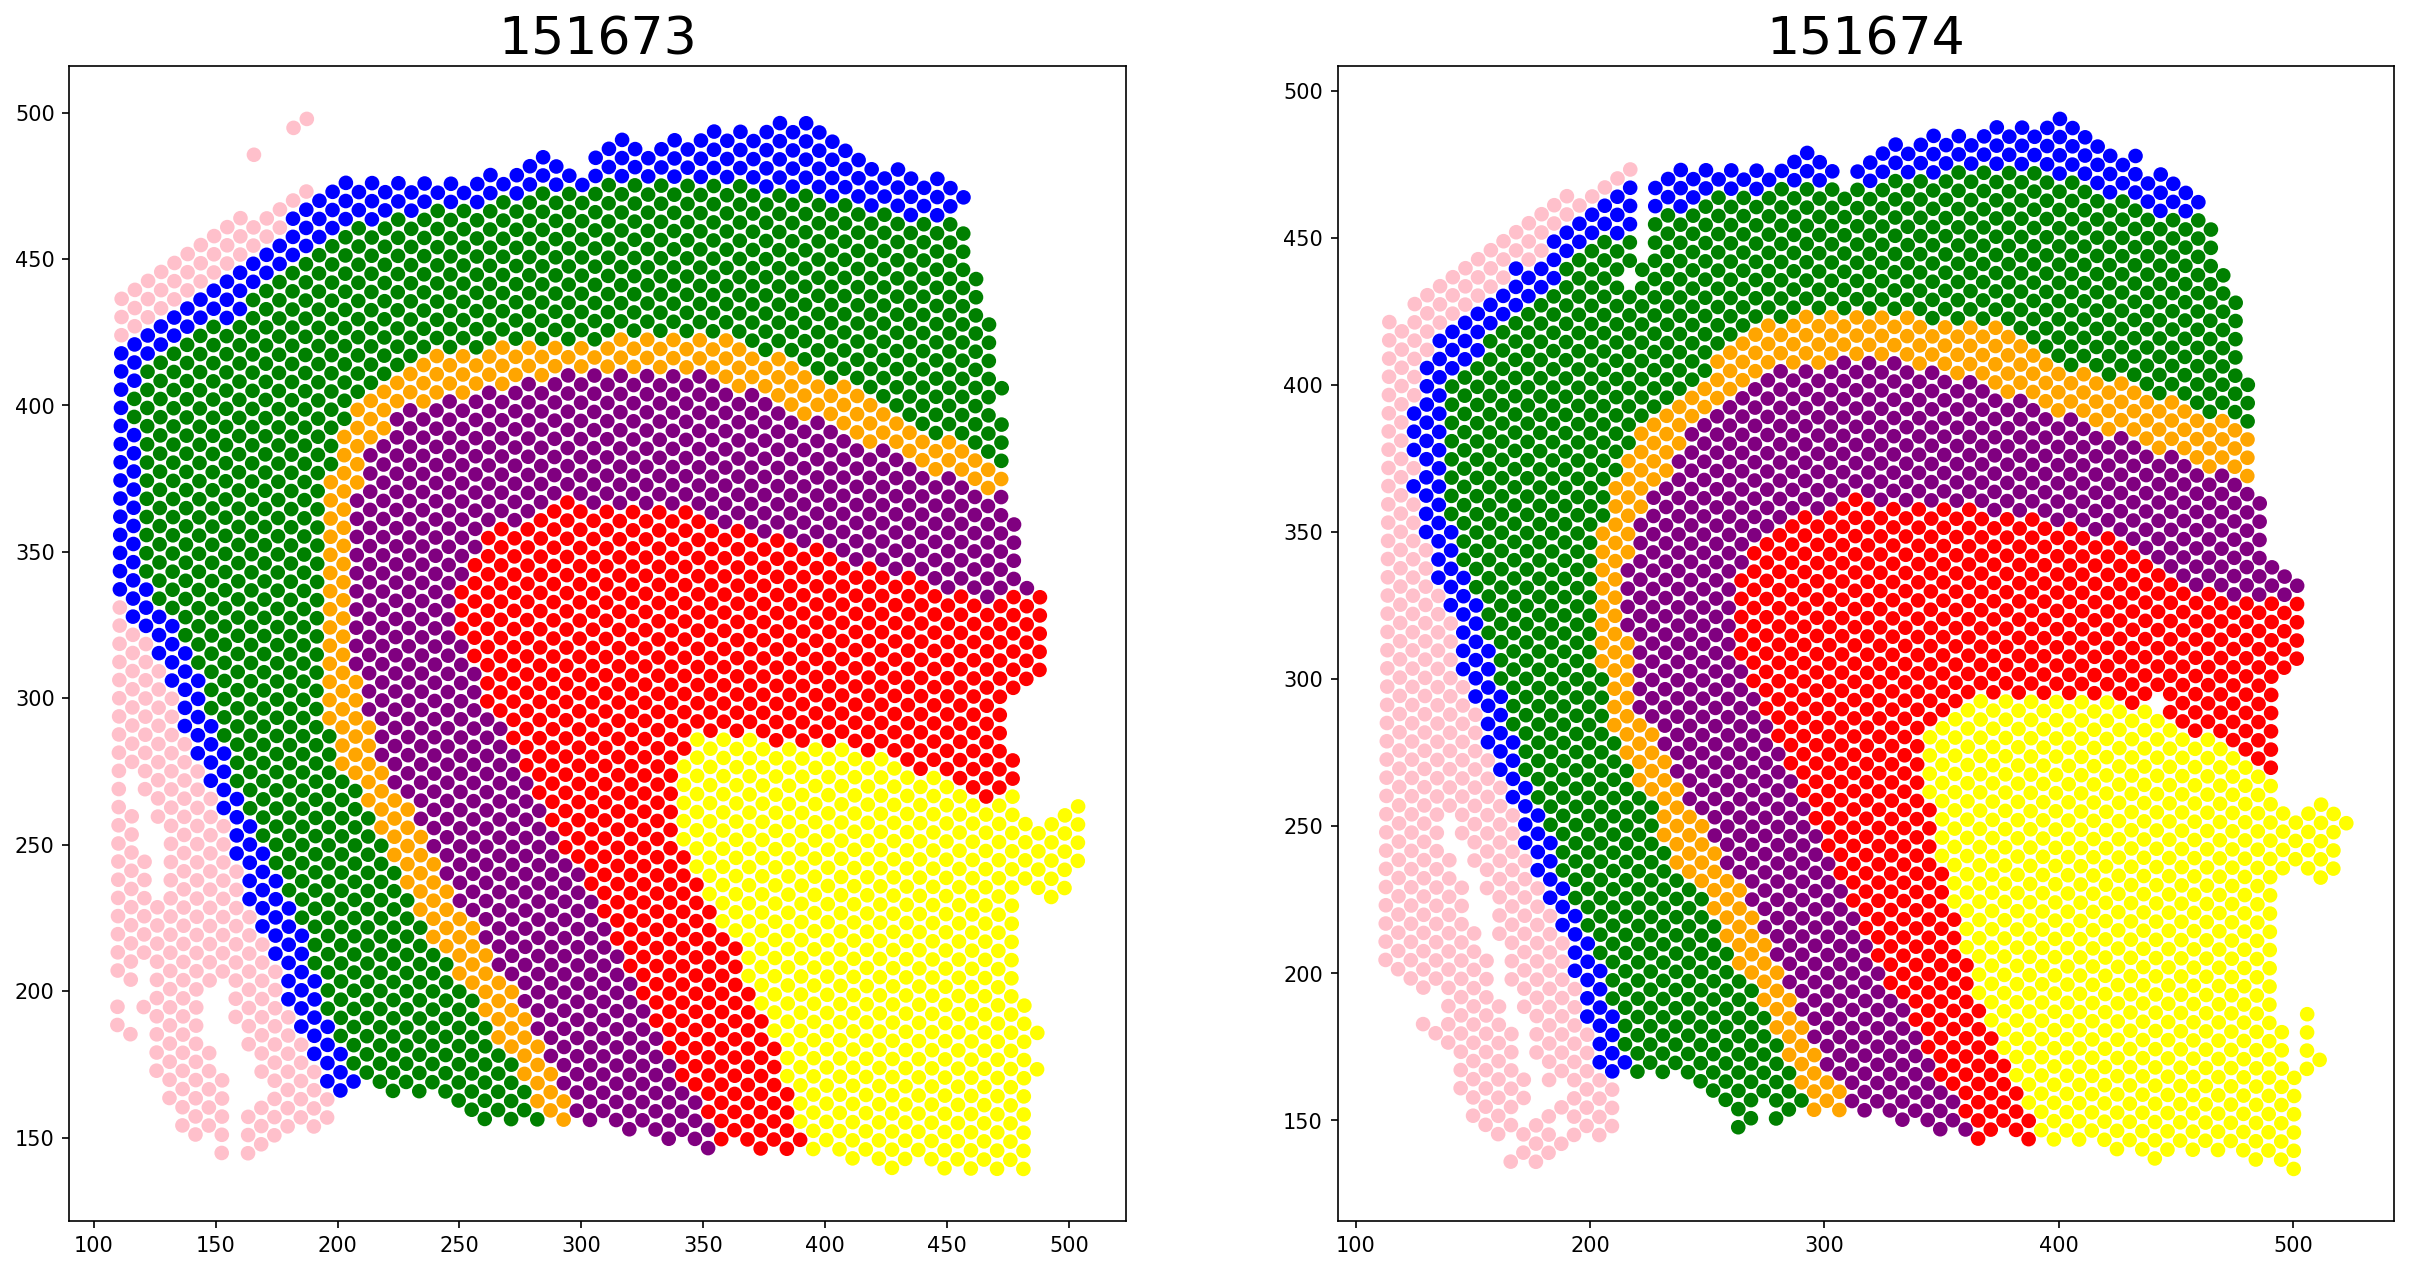

In [7]:
plt.figure(dpi=150,figsize=(20,10))
a=1
for i in np.array(sampleid):
    plt.subplot(1,2,a)
    plt.scatter(globals()[f"data_{i}"].obsm['spatial'][:,0],globals()[f"data_{i}"].obsm['spatial'][:,1],c=globals()[f"data_{i}"].obsm['color'][:,0])
    plt.title(f'{i}',fontsize=25)
    a=a+1

In [8]:
for i in np.array(sampleid):
    print(globals()[f"data_{i}"])

AnnData object with n_obs × n_vars = 3611 × 1156
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial', 'celltype', 'color'
    layers: 'counts'
AnnData object with n_obs × n_vars = 3635 × 1156
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial', 'celltype', 'color'
    layers: 'counts'


## Save and run profast

In [9]:
for i in np.array(sampleid):
    globals()[f"data_{i}"].write_h5ad(f'{path}/data_{i}.h5ad')
    gene=pd.DataFrame(globals()[f"data_{i}"].layers["counts"])
    gene.index=globals()[f"data_{i}"].obs_names
    gene.columns=globals()[f"data_{i}"].var_names
    pd.DataFrame(gene).to_csv(f'{path}/profast_gene_{i}.csv',header=True, index=True)
    pd.DataFrame(globals()[f"data_{i}"].obsm['spatial']).to_csv(f'{path}/profast_spatial_{i}.csv',header=False, index=False)